<a href="https://colab.research.google.com/github/atran163/shopify2021/blob/master/Shopify_2021_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sb

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Research Question



On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
What metric would you report for this dataset?
What is its value?

### Playing with the Data


In [ ]:
df = pd.read_csv("shopify_data.csv")
df.head()

order_id  shop_id  user_id  ...  total_items  payment_method           created_at
0         1       53      746  ...            2            cash  2017-03-13 12:36:56
1         2       92      925  ...            1            cash  2017-03-03 17:38:52
2         3       44      861  ...            1            cash   2017-03-14 4:23:56
3         4       18      935  ...            1     credit_card  2017-03-26 12:43:37
4         5       18      883  ...            1     credit_card   2017-03-01 4:35:11

[5 rows x 7 columns]

**What variables we are working with:**
*   order_id = unique for every order, values do not repeat
*   shop_id = 100 unique values for 100 different shops 


*   user_id = 300 people bought shoes 
*   order_amount = price spent in total


*   total_items = users may have bought 1 or more items
*   payment_method = cash, card, debit


*   created_at = when the item was purchased









**We are examining AOV which is defined as average value of a shop's sales**
Let's look at the distribution of prices.

> It seems that most purchases are in between $0 - $10,000. This doesn't tell us much, but Python automatically gave us these bin widths. Why? Because we see that a user has bought a total of at least $60,000.


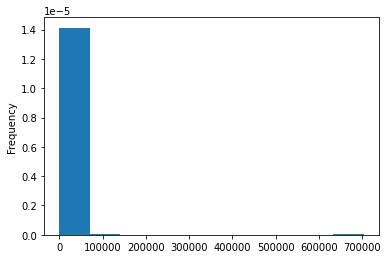

In [ ]:
df["order_amount"].plot.hist(density = True)

**Let's find this user in the data to see if we can know more about the purchase**


> The code states to give me the original dataframe where the order_amount is equal to the maximum order amount in our dataset. 





> We see that user_id 607 has bought 2,000 shoes each time through credit card through shop_id 42. Weird... They buy the same amount and same number of items each time, and they always buy at 4pm. 



**Looks like something suspicious is going on down here**


In [ ]:
df[df["order_amount"] == df["order_amount"].max()]  

order_id  shop_id  ...  payment_method          created_at
15          16       42  ...     credit_card  2017-03-07 4:00:00
60          61       42  ...     credit_card  2017-03-04 4:00:00
520        521       42  ...     credit_card  2017-03-02 4:00:00
1104      1105       42  ...     credit_card  2017-03-24 4:00:00
1362      1363       42  ...     credit_card  2017-03-15 4:00:00
1436      1437       42  ...     credit_card  2017-03-11 4:00:00
1562      1563       42  ...     credit_card  2017-03-19 4:00:00
1602      1603       42  ...     credit_card  2017-03-17 4:00:00
2153      2154       42  ...     credit_card  2017-03-12 4:00:00
2297      2298       42  ...     credit_card  2017-03-07 4:00:00
2835      2836       42  ...     credit_card  2017-03-28 4:00:00
2969      2970       42  ...     credit_card  2017-03-28 4:00:00
3332      3333       42  ...     credit_card  2017-03-24 4:00:00
4056      4057       42  ...     credit_card  2017-03-28 4:00:00
4646      4647       42  ...     credit_card  2017-03-02 4:00:00
4868      4869       42  ...     credit_card  2017-03-22 4:00:00
4882      4883       42  ...     credit_card  2017-03-25 4:00:00

[17 rows x 7 columns]

This person bought shoes with an average price of 352 dollars! A lot more expensive than other stores.

In [ ]:
704000 / 2000

352.0

**Let's calculate AOV anyways with this user to see what we find**

In [ ]:
df.groupby("shop_id")["order_amount"].mean()

shop_id
1      308.818182
2      174.327273
3      305.250000
4      258.509804
5      290.311111
          ...    
96     330.000000
97     324.000000
98     245.362069
99     339.444444
100    213.675000
Name: order_amount, Length: 100, dtype: float64

In [ ]:
df.groupby("shop_id")["order_amount"].mean().mean()

3136.834087887025

**Okay, we found close to the same amount**

AOV stands for average order value. To find this, I took each store, and found there average order value. For example, the first shop has an AOV of 308. The next is 174, then 305, and so on. I then took the average of these values to find the overall AOV, of $3136. 

### Why AOV Isn't The Best

AOV has many pros, but AOV is not a good metric with outlier values. We saw how much it skewed our AOV with that one user's mass shopping spree. Here's why else it isn't the best:



1.   It's good that we're calculating AOV with just shoes. But shoes have a relatively wide price range.
2.   It's hard to notice conversion rate through AOV. Many ecommerce businesses do want sales, but they also want new customers! Our AOV is so skewed because it was *one* singular customer buying big purchases









### So, What Should We Use?

Depends! The main question we shoud ask the customer/business owner is **what do you want to achieve?**

If you are looking to boost sales overall, you should look at Daily Sales, Conversion Rates, Site Traffic

If you are looking to draw in new customers, you should look at Shopping Cart Abandonement Rate, Competitive Pricing

If you are looking to reduce customer service emails, you should look at which websites/pages are being looked at before 